In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_excel('Student Activities and Academic Performance Data.xlsx')

In [2]:
df['Involved'] = df['Are you involved in any extracurricular activities? ']
df['Extracurricular Activities'] = df['Which extracurricular activities are you involved in? (Check all that apply)']
df['Level'] = df['Year of Study']
df['Impact'] = df['How do you perceive the impact of your extracurricular involvement on your academic performance? (Choose N/A if You are not involved in Extracurricular activities)']
df['GPA'] = df['What is your current CGPA']
df['Satisfaction'] = df['How satisfied are you with your current academic performance?']
df['Time'] = df['How many hours (per week) do you typically spend on extracurricular activities?']

In [5]:
# Perform data analysis
# Calculate average GPA for students involved and not involved in extracurricular activities
avg_gpa_involved = df[df['Involved'] == 'Yes']['GPA'].mean()
avg_gpa_not_involved = df[df['Involved'] == 'No']['GPA'].mean()
std_involved = df[df['Involved'] == 'Yes']['GPA'].std()
std_not_involved = df[df['Involved'] == 'No']['GPA'].std()
print("Average GPA for students involved in extracurricular activities:", avg_gpa_involved)
print("Average GPA for students not involved in extracurricular activities:", avg_gpa_not_involved)
print("Standard Deviation for students involved in extracurricular activities:", std_involved)
print("Standard Deviation for students not involved in extracurricular activities:", std_not_involved)

Average GPA for students involved in extracurricular activities: 3.0830434782608696
Average GPA for students not involved in extracurricular activities: 2.384
Standard Deviation for students involved in extracurricular activities: 0.7184480419159108
Standard Deviation for students not involved in extracurricular activities: 0.5547211511701672


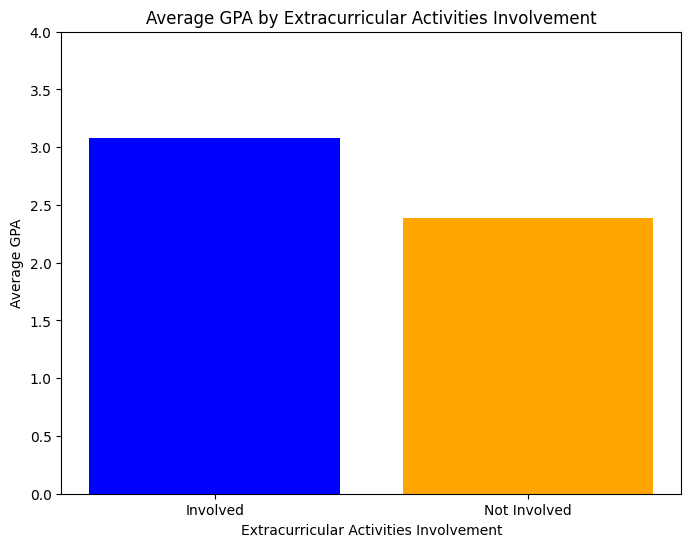

In [6]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.bar(['Involved', 'Not Involved'], [avg_gpa_involved, avg_gpa_not_involved], color=['blue', 'orange'])
plt.title('Average GPA by Extracurricular Activities Involvement')
plt.xlabel('Extracurricular Activities Involvement')
plt.ylabel('Average GPA')
plt.ylim(0, 4.0)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

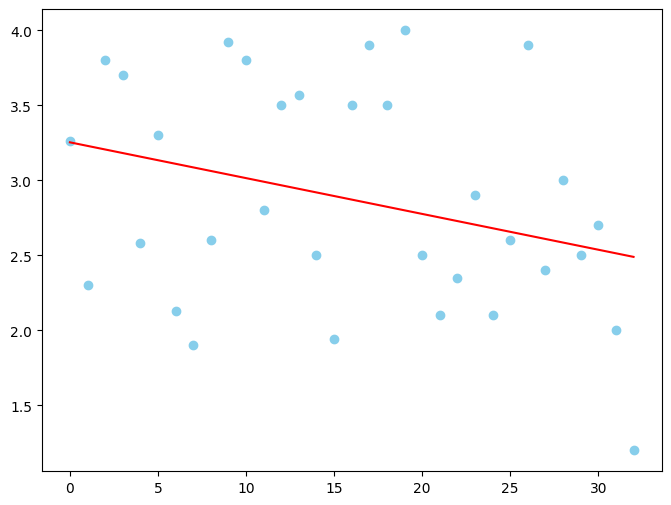

In [13]:
x = np.arange(len(df['Time']))
y = df['GPA']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', label='Data points')

# Add linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, color='red', label='Linear regression')

plt.xlabel(df['Time'])
plt.ylabel(df['GPA'])
plt.title('Scatter Plot with Linear Regression Line')
plt.xticks(x, df['Time'])
plt.legend()
plt.tight_layout()
plt.show()


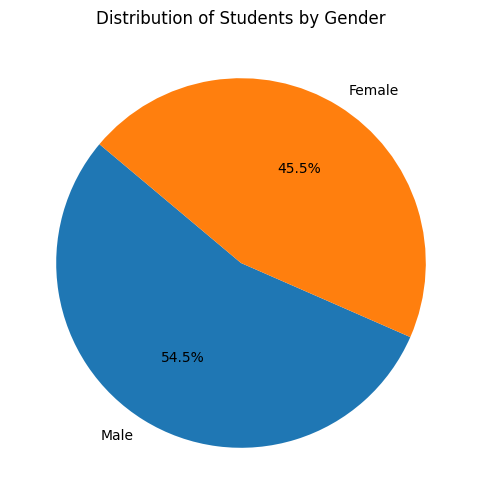

In [8]:
#pie chart to visualize the distribution of students by gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students by Gender')
plt.show()

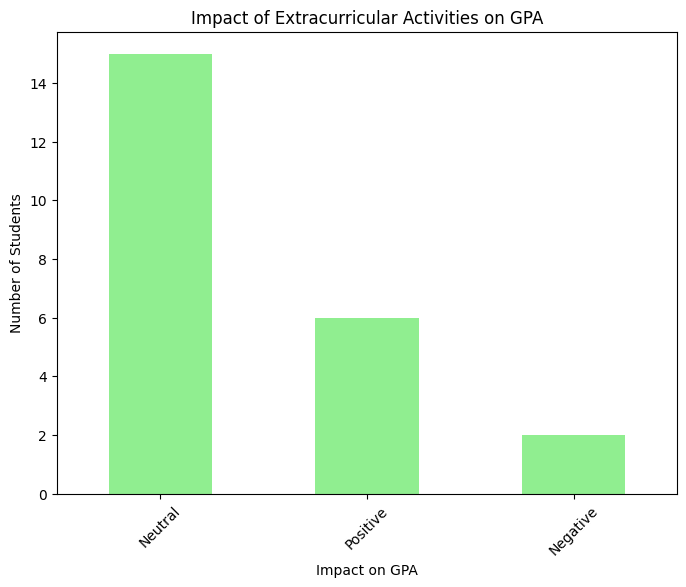

In [9]:
#bar chart to visualize the impact of extracurricular activities on GPA
impact_gpa_counts = df[df['Involved'] == 'Yes']['Impact'].value_counts()
plt.figure(figsize=(8, 6))
impact_gpa_counts.plot(kind='bar', color='lightgreen')
plt.title('Impact of Extracurricular Activities on GPA')
plt.xlabel('Impact on GPA')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

In [10]:
print(df.describe())

             Age  What is your current CGPA        GPA
count  33.000000                  33.000000  33.000000
mean   18.969697                   2.871212   2.871212
std     0.883348                   0.740164   0.740164
min    17.000000                   1.200000   1.200000
25%    19.000000                   2.350000   2.350000
50%    19.000000                   2.700000   2.700000
75%    19.000000                   3.500000   3.500000
max    20.000000                   4.000000   4.000000


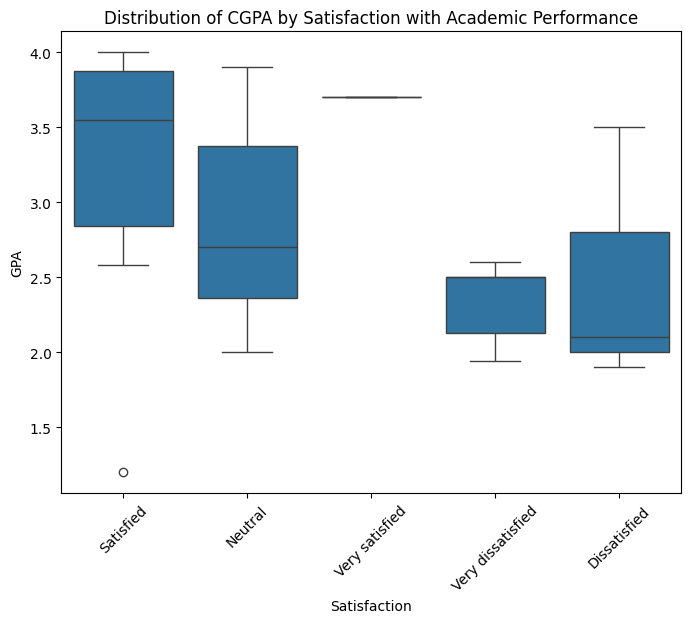

In [11]:
#boxplot to visualize the distribution of CGPA by satisfaction with academic performance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Satisfaction', y='GPA', data=df)
plt.title('Distribution of CGPA by Satisfaction with Academic Performance')
plt.xlabel('Satisfaction')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

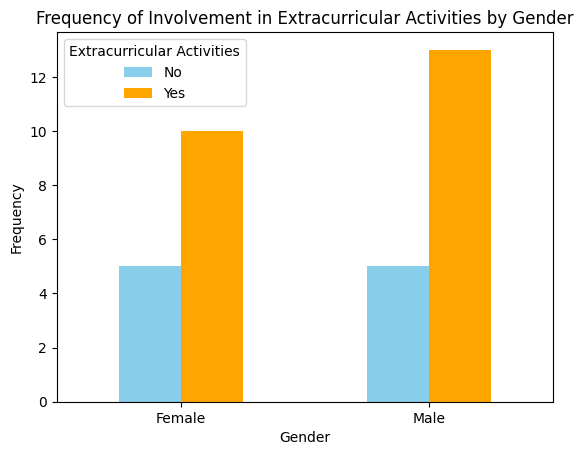

In [13]:
#frequency chart for gender and involvement in extracurricular activities
gender_activity_freq = pd.crosstab(index=df['Gender'], columns=df['Involved'])

plt.figure(figsize=(8, 6))
gender_activity_freq.plot(kind='bar', stacked=False, color=['skyblue', 'orange'])
plt.title('Frequency of Involvement in Extracurricular Activities by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Extracurricular Activities')
plt.show()

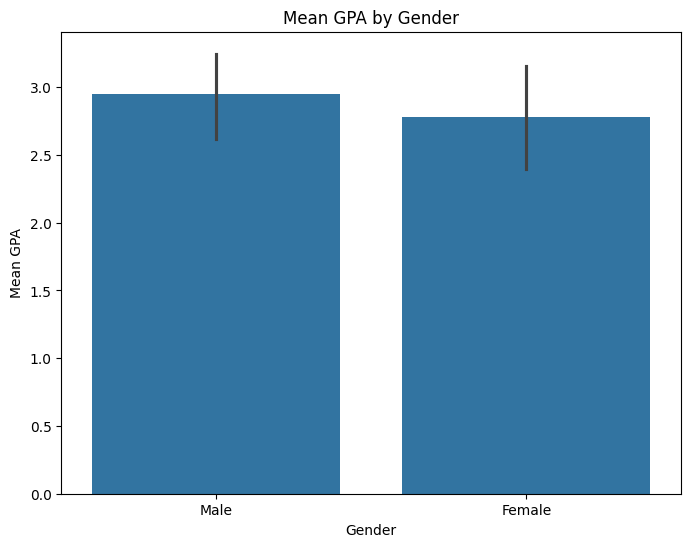

In [14]:
#bar chart to display the mean GPA for both genders
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='GPA', data=df)
plt.title('Mean GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean GPA')
plt.show()

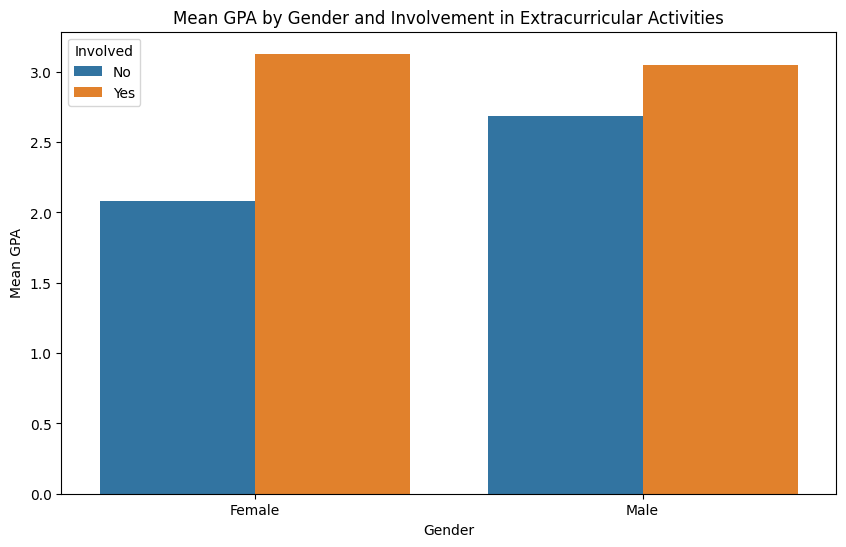

In [15]:
#bar chart to display the mean GPA for both genders that are involved and not involved in extracurricular activities
mean_gpa_gender_activities = df.groupby(['Gender', 'Involved'])['GPA'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='GPA', hue='Involved', data=mean_gpa_gender_activities)
plt.title('Mean GPA by Gender and Involvement in Extracurricular Activities')
plt.xlabel('Gender')
plt.ylabel('Mean GPA')
plt.show()

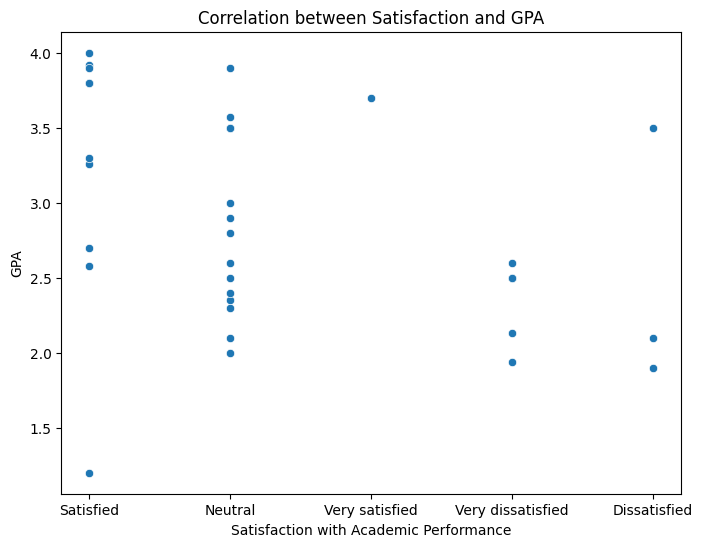

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction', y='GPA', data=df)
plt.title('Correlation between Satisfaction and GPA')
plt.xlabel('Satisfaction with Academic Performance')
plt.ylabel('GPA')
plt.show()

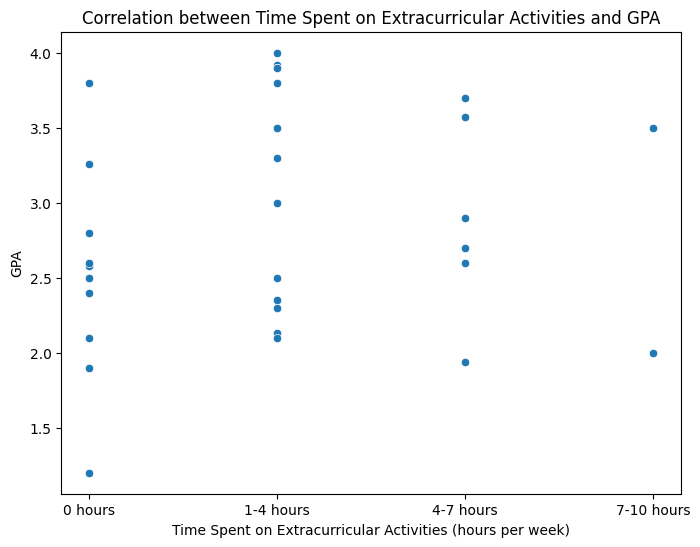

In [17]:
# Correlation between Time Spent on Extracurricular Activities and GPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time', y='GPA', data=df)
plt.title('Correlation between Time Spent on Extracurricular Activities and GPA')
plt.xlabel('Time Spent on Extracurricular Activities (hours per week)')
plt.ylabel('GPA')
plt.show()

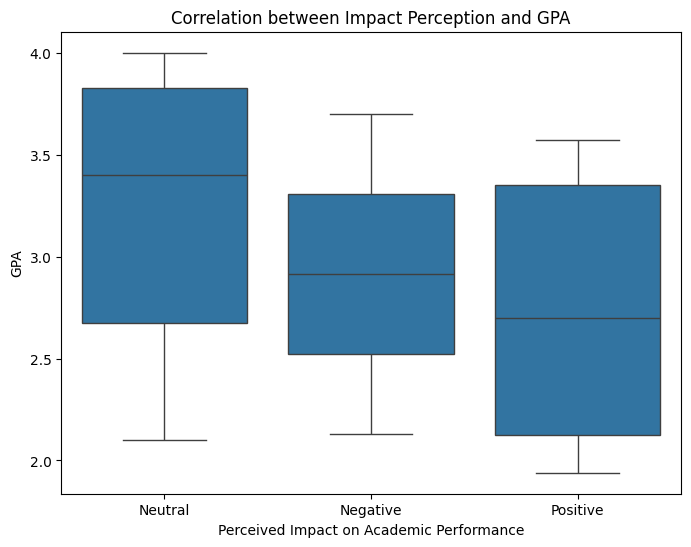

In [18]:
# Correlation between Impact Perception and GPA
plt.figure(figsize=(8, 6))
sns.boxplot(x='Impact', y='GPA', data=df)
plt.title('Correlation between Impact Perception and GPA')
plt.xlabel('Perceived Impact on Academic Performance')
plt.ylabel('GPA')
plt.show()

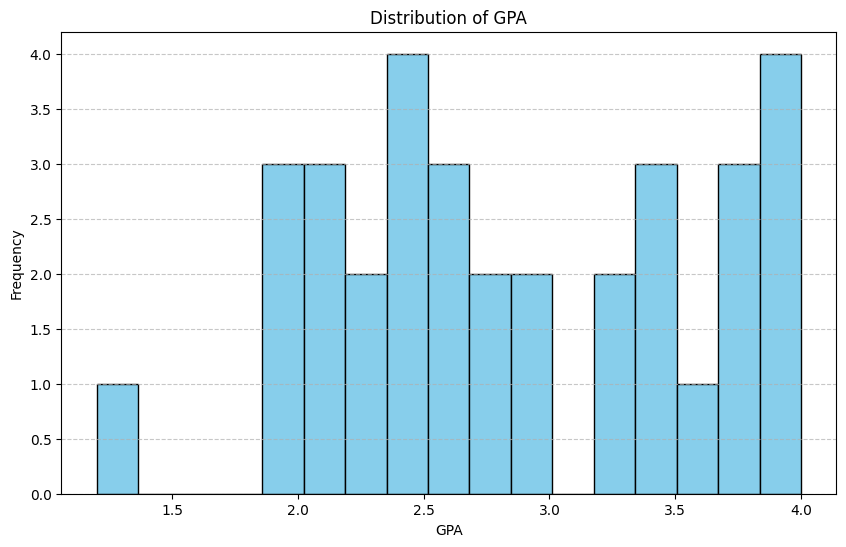

In [19]:
#distribution of GPA
plt.figure(figsize=(10, 6))
plt.hist(df['GPA'], bins=17, color='skyblue', edgecolor='black')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()